# Health Insurance Lead Prediction

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Acquisition](#Data_Acquisition)
* [Data Wrangling](#Data_Wrangling)
* [Data Exploration](#Data_Exploration)
* [Model Development](#Model_Development)

In [1]:
# scintific computing libraries
import pandas as pd                                      
import numpy as np                    
from scipy import optimize, stats        

# visualisation libraries
import matplotlib.pyplot as plt                      
import seaborn as sns                

# algorithmic library
from sklearn.svm import SVC                
from sklearn.linear_model import LogisticRegression                              
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  
from sklearn.utils import resample

## Introduction: Business Problem

A financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.
Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

In this project, I have to build a model to predict whether the person will be interested in their proposed Health plan/policy.

## Data Acquisition

In [387]:
df_train = pd.read_csv('train_Df64byy.csv')
print(df_train.shape)
df_train.head()

(50882, 14)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [388]:
df_test = pd.read_csv('test_YCcRUnU.csv')
print(df_test.shape)
df_test.head()

(21805, 13)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [389]:
df_submission = pd.read_csv('sample_submission_QrCyCoT.csv')
print(df_submission.shape)
df_submission.head()

(21805, 2)


,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


## Data Wrangling

In [390]:
df_train.describe(include='all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882,50882.000000,50882,50882,50882.000000,50882.000000,50882,39191,30631,30631.000000,50882.000000,50882.000000,50882.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,1.0,NaN,NaN,NaN,NaN
freq,NaN,8973,NaN,27951,40536,NaN,NaN,42460,13010,4499,NaN,NaN,NaN,NaN
mean,25441.500000,NaN,1732.788707,NaN,NaN,44.856275,42.738866,NaN,NaN,NaN,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,NaN,1424.081652,NaN,NaN,17.310271,17.319375,NaN,NaN,NaN,1.025923,6.340663,6590.074873,0.427055
min,1.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,NaN,523.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,NaN,1391.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,NaN,2667.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18096.000000,0.000000


In [391]:
def data_analysis(df1,  df2):
    print('train_shape:', df1.shape)
    print('test_shape:', df2.shape)
    train_dtype = []
    train_isnull = []
    train_unique = []
    test_dtype = []
    test_isnull = []
    test_unique = []
    for col in df2.columns:
        train_dtype.append(df1[col].dtypes)
        train_isnull.append(df1[col].isnull().sum())
        train_unique.append(df1[col].unique().shape[0])
        test_dtype.append(df2[col].dtypes)
        test_isnull.append(df2[col].isnull().sum())
        test_unique.append(df2[col].unique().shape[0])

    df = pd.DataFrame({'train_dtype':train_dtype,'test_dtype':test_dtype,'train_isnull':train_isnull,'test_isnull':test_isnull,
                       'train_unique':train_unique,'test_unique':test_unique}, index=df2.columns)
    df.sort_values(['train_isnull'], axis=0, ascending=False, inplace=True)
    return df

In [392]:
data_analysis(df_train,  df_test)

train_shape: (50882, 14)
test_shape: (21805, 13)


,train_dtype,test_dtype,train_isnull,test_isnull,train_unique,test_unique
Holding_Policy_Duration,object,object,20251,8603,16,16
Holding_Policy_Type,float64,float64,20251,8603,5,5
Health Indicator,object,object,11691,5027,10,10
ID,int64,int64,0,0,50882,21805
City_Code,object,object,0,0,36,36
Region_Code,int64,int64,0,0,5316,4694
Accomodation_Type,object,object,0,0,2,2
Reco_Insurance_Type,object,object,0,0,2,2
Upper_Age,int64,int64,0,0,58,58
Lower_Age,int64,int64,0,0,60,60


#### Feature: 'Response'

In [393]:
df_train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

#### Feature: 'Accomodation_Type', 'Reco_Insurance_Type' , 'Is_Spouse'

In [394]:
df_train['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [395]:
df_train['Accomodation_Type'] = df_train['Accomodation_Type'].map(lambda X : 0 if X == 'Owned' else 1)
df_test['Accomodation_Type'] = df_test['Accomodation_Type'].map(lambda X : 0 if X == 'Owned' else 1)

In [396]:
df_train['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

In [397]:
df_train['Reco_Insurance_Type'] = df_train['Reco_Insurance_Type'].map(lambda X : 0 if X == 'Individual' else 1)
df_test['Reco_Insurance_Type'] = df_test['Reco_Insurance_Type'].map(lambda X : 0 if X == 'Individual' else 1)

In [398]:
df_train['Is_Spouse'].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [399]:
df_train['Is_Spouse'] = df_train['Is_Spouse'].map(lambda X : 0 if X == 'No' else 1)
df_test['Is_Spouse'] = df_test['Is_Spouse'].map(lambda X : 0 if X == 'No' else 1)

#### Feature: 'Lower_Age' and 'Upper_Age'

In [400]:
df_train['Average_Age'] = (df_train['Upper_Age']+df_train['Lower_Age'])//2
df_test['Average_Age'] = (df_test['Upper_Age']+df_test['Lower_Age'])//2

In [401]:
columns = ['Lower_Age','Upper_Age','Average_Age']
for col in columns:
    pearson_coef, p_value = stats.pearsonr(df_train[col], df_train['Response'])
    print(col,':', pearson_coef,',', p_value)

Lower_Age : -0.0020987277552719057 , 0.635928025761054
Upper_Age : 0.0027722366141682696 , 0.5317608408887111
Average_Age : 0.00023495879501589292 , 0.9577331464654973


In [402]:
df_train.drop(['Lower_Age','Average_Age'], axis=1, inplace=True)
df_test.drop(['Lower_Age','Average_Age'], axis=1, inplace=True)

#### Feature: 'City_Code'

In [403]:
df_train['City_Code'] = df_train['City_Code'].map(lambda X : int(X[1:]))
df_test['City_Code'] = df_test['City_Code'].map(lambda X : int(X[1:]))

In [404]:
df_train['City_Code'] = LabelEncoder().fit_transform(df_train['City_Code']) 
df_test['City_Code'] = LabelEncoder().fit_transform(df_test['City_Code']) 

## Data Exploration

In [405]:
data_analysis(df_train,  df_test)

train_shape: (50882, 13)
test_shape: (21805, 12)


,train_dtype,test_dtype,train_isnull,test_isnull,train_unique,test_unique
Holding_Policy_Duration,object,object,20251,8603,16,16
Holding_Policy_Type,float64,float64,20251,8603,5,5
Health Indicator,object,object,11691,5027,10,10
ID,int64,int64,0,0,50882,21805
City_Code,int64,int64,0,0,36,36
Region_Code,int64,int64,0,0,5316,4694
Accomodation_Type,int64,int64,0,0,2,2
Reco_Insurance_Type,int64,int64,0,0,2,2
Upper_Age,int64,int64,0,0,58,58
Is_Spouse,int64,int64,0,0,2,2


### Dealing with missing values

#### Feature: 'Health Indicator'

In [406]:
print(df_train['Health Indicator'].value_counts())
print(df_test['Health Indicator'].value_counts())

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64
X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64


In [407]:
df_train['Health Indicator'].fillna('X0', inplace=True)
df_test['Health Indicator'].fillna('X0', inplace=True)

df_train['Health Indicator'] = df_train['Health Indicator'].map(lambda X : int(X[1:]))
df_test['Health Indicator'] = df_test['Health Indicator'].map(lambda X : int(X[1:]))

In [408]:
'''dummy_test = df_train[df_train['Health Indicator'].isnull() == True]
print(dummy_test.shape)
dummy_train = df_train.dropna(subset = ['Health Indicator'], axis = 0)
dummy_train['Health Indicator'] = dummy_train['Health Indicator'].map(lambda X : int(X[1:]))
print(dummy_train.shape)

y_train1 = dummy_train['Health Indicator'].values
x_train1 = dummy_train.drop(['ID','Holding_Policy_Duration','Holding_Policy_Type','Health Indicator'], axis = 1)
x_test1 = dummy_test.drop(['ID','Holding_Policy_Duration','Holding_Policy_Type','Health Indicator'], axis = 1)

print(x_train1.shape, y_train1.shape)
print(x_test1.shape)

XGB = XGBClassifier(n_estimators=100, learning_rate=0.8, max_depth=10, random_state=0)
XGB.fit(x_train1, y_train1)

print(classification_report(y_train1, XGB.predict(x_train1)))

dummy_test['Health Indicator'] = XGB.predict(x_test1)

df_train = pd.concat([dummy_train, dummy_test])
df_train.sort_values(['ID'], axis=0, inplace=True)
print(df_train.shape)
df_train.head()'''

"dummy_test = df_train[df_train['Health Indicator'].isnull() == True]\nprint(dummy_test.shape)\ndummy_train = df_train.dropna(subset = ['Health Indicator'], axis = 0)\ndummy_train['Health Indicator'] = dummy_train['Health Indicator'].map(lambda X : int(X[1:]))\nprint(dummy_train.shape)\n\ny_train1 = dummy_train['Health Indicator'].values\nx_train1 = dummy_train.drop(['ID','Holding_Policy_Duration','Holding_Policy_Type','Health Indicator'], axis = 1)\nx_test1 = dummy_test.drop(['ID','Holding_Policy_Duration','Holding_Policy_Type','Health Indicator'], axis = 1)\n\nprint(x_train1.shape, y_train1.shape)\nprint(x_test1.shape)\n\nXGB = XGBClassifier(n_estimators=100, learning_rate=0.8, max_depth=10, random_state=0)\nXGB.fit(x_train1, y_train1)\n\nprint(classification_report(y_train1, XGB.predict(x_train1)))\n\ndummy_test['Health Indicator'] = XGB.predict(x_test1)\n\ndf_train = pd.concat([dummy_train, dummy_test])\ndf_train.sort_values(['ID'], axis=0, inplace=True)\nprint(df_train.shape)\ndf_

In [409]:
'''df_train['Holding_Policy_Type'] = Holding_Policy_Type1
df_test['Holding_Policy_Type'] = Holding_Policy_Type2
df_train['Holding_Policy_Duration'] = Holding_Policy_Duration1
df_test['Holding_Policy_Duration'] = Holding_Policy_Duration2'''

"df_train['Holding_Policy_Type'] = Holding_Policy_Type1\ndf_test['Holding_Policy_Type'] = Holding_Policy_Type2\ndf_train['Holding_Policy_Duration'] = Holding_Policy_Duration1\ndf_test['Holding_Policy_Duration'] = Holding_Policy_Duration2"

#### Feature: 'Holding_Policy_Type'

In [410]:
print(df_train['Holding_Policy_Type'].value_counts())
print(df_test['Holding_Policy_Type'].value_counts())

3.0    13279
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64
3.0    5572
1.0    3574
2.0    2150
4.0    1906
Name: Holding_Policy_Type, dtype: int64


In [411]:
df_train.corr()['Holding_Policy_Type'].sort_values()

Accomodation_Type     -0.151030
City_Code             -0.098333
ID                     0.006649
Response               0.009297
Region_Code            0.011599
Health Indicator       0.038781
Reco_Policy_Cat        0.079678
Reco_Insurance_Type    0.082445
Is_Spouse              0.090459
Reco_Policy_Premium    0.121342
Upper_Age              0.141890
Holding_Policy_Type    1.000000
Name: Holding_Policy_Type, dtype: float64

In [412]:
dummy_test = df_train[df_train['Holding_Policy_Type'].isin(['NaN'])]
print(dummy_test.shape)
dummy_train = df_train.dropna(subset = ['Holding_Policy_Type'], axis = 0)
dummy_train['Holding_Policy_Type'] = dummy_train['Holding_Policy_Type'].astype('int')
print(dummy_train.shape)
dummy_train.head()

(20251, 13)
(30631, 13)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,2,3213,1,0,36,0,1,14+,3,22,11628.0,0
2,3,4,3732,0,0,32,0,0,1.0,1,19,7450.0,1
3,4,23,4378,0,1,52,0,1,14+,3,19,17780.0,0
4,5,7,2190,1,0,44,0,2,3.0,1,16,10404.0,0
5,6,8,1785,1,0,52,0,2,5.0,1,22,15264.0,1


In [413]:
y_train1 = dummy_train['Holding_Policy_Type'].values
x_train1 = dummy_train.drop(['ID','Holding_Policy_Duration','Holding_Policy_Type','Response'], axis = 1)
x_test1 = dummy_test.drop(['ID','Holding_Policy_Duration','Holding_Policy_Type','Response'], axis = 1)

print(x_train1.shape, y_train1.shape)
print(x_test1.shape)

(30631, 9) (30631,)
(20251, 9)


In [414]:
XGB = XGBClassifier(n_estimators=100, learning_rate=0.8, max_depth=10, random_state=0)
XGB.fit(x_train1, y_train1)

print(classification_report(y_train1, XGB.predict(x_train1)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      8173
           2       1.00      1.00      1.00      5005
           3       1.00      1.00      1.00     13279
           4       1.00      1.00      1.00      4174

    accuracy                           1.00     30631
   macro avg       1.00      1.00      1.00     30631
weighted avg       1.00      1.00      1.00     30631



In [415]:
dummy_test['Holding_Policy_Type'] = XGB.predict(x_test1)

C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [416]:
df_train = pd.concat([dummy_train, dummy_test])
df_train.sort_values(['ID'], axis=0, inplace=True)
print(df_train.shape)
df_train.head()

(50882, 13)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,2,3213,1,0,36,0,1,14+,3,22,11628.0,0
1,2,4,1117,0,1,75,0,2,NaN,4,22,30510.0,0
2,3,4,3732,0,0,32,0,0,1.0,1,19,7450.0,1
3,4,23,4378,0,1,52,0,1,14+,3,19,17780.0,0
4,5,7,2190,1,0,44,0,2,3.0,1,16,10404.0,0


In [417]:
dummy_test2 = df_test[df_test['Holding_Policy_Type'].isin(['NaN'])]
print(dummy_test2.shape)

dummy_train2 = df_test.dropna(subset = ['Holding_Policy_Type'], axis = 0)
dummy_train2['Holding_Policy_Type'] = dummy_train2['Holding_Policy_Type'].astype('int')
print(dummy_train2.shape)

x_test2 = dummy_test2.drop(['ID','Holding_Policy_Duration','Holding_Policy_Type'], axis = 1)
print(x_test2.shape)

(8603, 12)
(13202, 12)
(8603, 9)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [418]:
dummy_test2['Holding_Policy_Type'] = XGB.predict(x_test2)

C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [419]:
df_test = pd.concat([dummy_train2, dummy_test2])
df_test.sort_values(['ID'], axis=0, inplace=True)
print(df_test.shape)
df_test.head()

(21805, 12)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,0,156,0,0,30,0,0,6.0,3,5,11934.0
1,50884,3,7,0,1,69,1,1,3.0,3,18,32204.8
2,50885,0,564,1,0,28,0,3,2.0,4,17,9240.0
3,50886,2,1177,1,0,23,0,3,3.0,3,18,9086.0
4,50887,0,951,0,0,75,0,3,NaN,3,5,22534.0


In [420]:
Holding_Policy_Type1 = df_train['Holding_Policy_Type']
Holding_Policy_Type2 = df_test['Holding_Policy_Type']

#### Feature: 'Holding_Policy_Duration'

In [421]:
print(df_train['Holding_Policy_Duration'].value_counts())
print(df_test['Holding_Policy_Duration'].value_counts())

1.0     4499
14+     4335
2.0     4260
3.0     3586
4.0     2771
5.0     2362
6.0     1894
7.0     1645
8.0     1316
9.0     1114
10.0     813
11.0     546
12.0     513
13.0     511
14.0     466
Name: Holding_Policy_Duration, dtype: int64
14+     1892
1.0     1891
2.0     1772
3.0     1606
4.0     1205
5.0      992
6.0      903
7.0      664
8.0      569
9.0      493
10.0     333
11.0     254
13.0     221
14.0     211
12.0     196
Name: Holding_Policy_Duration, dtype: int64


In [422]:
df_train['Holding_Policy_Duration'].replace('14+', 15, inplace = True)
df_test['Holding_Policy_Duration'].replace('14+', 15, inplace = True)

In [423]:
dummy_test = df_train[df_train['Holding_Policy_Duration'].isnull() == True]
print(dummy_test.shape)
dummy_train = df_train.dropna(subset = ['Holding_Policy_Duration'], axis = 0)
dummy_train['Holding_Policy_Duration'] = pd.to_numeric(dummy_train['Holding_Policy_Duration'],errors='coerce')
print(dummy_train.shape)
dummy_train.head()

(20251, 13)
(30631, 13)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,2,3213,1,0,36,0,1,15.0,3,22,11628.0,0
2,3,4,3732,0,0,32,0,0,1.0,1,19,7450.0,1
3,4,23,4378,0,1,52,0,1,15.0,3,19,17780.0,0
4,5,7,2190,1,0,44,0,2,3.0,1,16,10404.0,0
5,6,8,1785,1,0,52,0,2,5.0,1,22,15264.0,1


In [424]:
y_train1 = dummy_train['Holding_Policy_Duration'].values
x_train1 = dummy_train.drop(['ID','Holding_Policy_Duration','Response'], axis = 1)
x_test1 = dummy_test.drop(['ID','Holding_Policy_Duration','Response'], axis = 1)

print(x_train1.shape, y_train1.shape)
print(x_test1.shape)

(30631, 10) (30631,)
(20251, 10)


In [425]:
XGB = XGBClassifier(n_estimators=100, learning_rate=0.8, max_depth=10, random_state=0)
XGB.fit(x_train1, y_train1)

print(classification_report(y_train1, XGB.predict(x_train1)))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      4499
         2.0       1.00      1.00      1.00      4260
         3.0       1.00      1.00      1.00      3586
         4.0       1.00      1.00      1.00      2771
         5.0       1.00      1.00      1.00      2362
         6.0       1.00      1.00      1.00      1894
         7.0       1.00      1.00      1.00      1645
         8.0       1.00      1.00      1.00      1316
         9.0       1.00      1.00      1.00      1114
        10.0       1.00      1.00      1.00       813
        11.0       1.00      1.00      1.00       546
        12.0       1.00      1.00      1.00       513
        13.0       1.00      1.00      1.00       511
        14.0       1.00      1.00      1.00       466
        15.0       1.00      1.00      1.00      4335

    accuracy                           1.00     30631
   macro avg       1.00      1.00      1.00     30631
weighted avg       1.00   

In [426]:
dummy_test['Holding_Policy_Duration'] = XGB.predict(x_test1)

C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [427]:
df_train = pd.concat([dummy_train, dummy_test])
df_train.sort_values(['ID'], axis=0, inplace=True)
print(df_train.shape)
df_train.head()

(50882, 13)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,2,3213,1,0,36,0,1,15.0,3,22,11628.0,0
1,2,4,1117,0,1,75,0,2,6.0,4,22,30510.0,0
2,3,4,3732,0,0,32,0,0,1.0,1,19,7450.0,1
3,4,23,4378,0,1,52,0,1,15.0,3,19,17780.0,0
4,5,7,2190,1,0,44,0,2,3.0,1,16,10404.0,0


In [428]:
dummy_test2 = df_test[df_test['Holding_Policy_Duration'].isnull() == True]
print(dummy_test.shape)

dummy_train2 = df_test.dropna(subset = ['Holding_Policy_Duration'], axis = 0)
dummy_train2['Holding_Policy_Duration'] = pd.to_numeric(dummy_train2['Holding_Policy_Duration'],errors='coerce')
print(dummy_train2.shape)

x_test2 = dummy_test2.drop(['ID','Holding_Policy_Duration'], axis = 1)
print(x_test2.shape)

(20251, 13)
(13202, 12)
(8603, 10)


C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [429]:
dummy_test2['Holding_Policy_Duration'] = XGB.predict(x_test2)

C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [430]:
df_test = pd.concat([dummy_train2, dummy_test2])
df_test.sort_values(['ID'], axis=0, inplace=True)
print(df_test.shape)
df_test.head()

(21805, 12)


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,0,156,0,0,30,0,0,6.0,3,5,11934.0
1,50884,3,7,0,1,69,1,1,3.0,3,18,32204.8
2,50885,0,564,1,0,28,0,3,2.0,4,17,9240.0
3,50886,2,1177,1,0,23,0,3,3.0,3,18,9086.0
4,50887,0,951,0,0,75,0,3,2.0,3,5,22534.0


In [431]:
Holding_Policy_Duration1 = df_train['Holding_Policy_Duration']
Holding_Policy_Duration2 = df_test['Holding_Policy_Duration']

### Correlation

In [432]:
df_train.corr()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.006633,-0.000465,-0.004649,-0.008505,-0.001725,-0.004262,0.002255,-0.000057,0.009709,-0.002235,-0.002350,0.005159
City_Code,-0.006633,1.000000,0.094949,0.074246,-0.015712,-0.109490,-0.023596,0.001170,-0.110200,-0.120520,-0.080572,-0.115067,-0.005424
Region_Code,-0.000465,0.094949,1.000000,0.009105,-0.004275,-0.005649,-0.002567,0.014765,0.025041,0.015309,-0.065120,-0.010797,0.001121
Accomodation_Type,-0.004649,0.074246,0.009105,1.000000,-0.196833,-0.419129,-0.191045,-0.031541,-0.288136,-0.148200,-0.022055,-0.350514,-0.005201
Reco_Insurance_Type,-0.008505,-0.015712,-0.004275,-0.196833,1.000000,0.227119,0.881560,0.035132,0.128063,0.083661,0.020826,0.596160,0.009891
Upper_Age,-0.001725,-0.109490,-0.005649,-0.419129,0.227119,1.000000,0.202947,0.015714,0.469621,0.137633,0.025257,0.792689,0.002772
Is_Spouse,-0.004262,-0.023596,-0.002567,-0.191045,0.881560,0.202947,1.000000,0.037621,0.118729,0.092341,0.022676,0.514727,0.003859
Health Indicator,0.002255,0.001170,0.014765,-0.031541,0.035132,0.015714,0.037621,1.000000,0.012139,0.022158,-0.002155,0.029464,0.003824
Holding_Policy_Duration,-0.000057,-0.110200,0.025041,-0.288136,0.128063,0.469621,0.118729,0.012139,1.000000,0.160341,0.051852,0.357946,0.014563
Holding_Policy_Type,0.009709,-0.120520,0.015309,-0.148200,0.083661,0.137633,0.092341,0.022158,0.160341,1.000000,0.093945,0.119723,0.006573


In [433]:
for col in df_train.columns:
    pearson_coef, p_value = stats.pearsonr(df_train[col], df_train['Response'])
    print(col,':', pearson_coef,',', p_value)

ID : 0.005158810953833243 , 0.24456419999310122
City_Code : -0.00542366576933921 , 0.22117965980976145
Region_Code : 0.0011207930952067393 , 0.8004138018287529
Accomodation_Type : -0.005201099093181955 , 0.2407183972262057
Reco_Insurance_Type : 0.009891323059183514 , 0.0256685895522423
Upper_Age : 0.0027722366141682696 , 0.5317608408887111
Is_Spouse : 0.0038589586254138986 , 0.38405526938617207
Health Indicator : 0.0038235751671536694 , 0.3884304210178367
Holding_Policy_Duration : 0.014562625530804653 , 0.0010198578624332278
Holding_Policy_Type : 0.006572698659301199 , 0.13818449834004462
Reco_Policy_Cat : 0.11432063734933653 , 1.3916192416233637e-147
Reco_Policy_Premium : 0.007943390711707993 , 0.07316853877051055
Response : 0.9999999999998496 , 0.0


### Dealing with outliers

#### Feature: 'Reco_Policy_Premium'

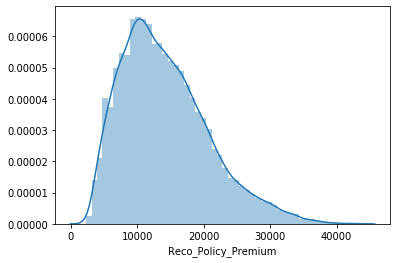

In [434]:
sns.distplot(df_train['Reco_Policy_Premium'])

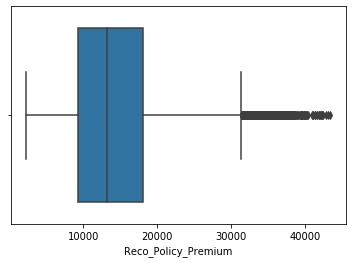

In [435]:
sns.boxplot(df_train['Reco_Policy_Premium'])

In [ ]:
#df_train = df_train[(stats.zscore(df_train['Reco_Policy_Premium'])>-3) & (stats.zscore(df_train['Reco_Policy_Premium'])<3)]

In [436]:
data_analysis(df_train,  df_test)

train_shape: (50882, 13)
test_shape: (21805, 12)


,train_dtype,test_dtype,train_isnull,test_isnull,train_unique,test_unique
ID,int64,int64,0,0,50882,21805
City_Code,int64,int64,0,0,36,36
Region_Code,int64,int64,0,0,5316,4694
Accomodation_Type,int64,int64,0,0,2,2
Reco_Insurance_Type,int64,int64,0,0,2,2
Upper_Age,int64,int64,0,0,58,58
Is_Spouse,int64,int64,0,0,2,2
Health Indicator,int64,int64,0,0,10,10
Holding_Policy_Duration,float64,float64,0,0,15,15
Holding_Policy_Type,int32,int32,0,0,4,4


one_hot_encoding

In [437]:
col_one_hot_encoding = ['City_Code','Health Indicator','Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat']
for col in col_one_hot_encoding:
    dummy_variable = pd.get_dummies(df_train[col])
    df_train = pd.concat([df_train, dummy_variable], axis=1)
    
    dummy_variable = pd.get_dummies(df_test[col])
    df_test = pd.concat([df_test, dummy_variable], axis=1)
    
df_train.drop(col_one_hot_encoding, axis=1, inplace=True)
df_test.drop(col_one_hot_encoding, axis=1, inplace=True)

In [438]:
'''df_train.loc[(df_train['Upper_Age'] <= 40), 'Age'] = 0
df_train.loc[(df_train['Upper_Age'] > 30) & (df_train['Upper_Age'] <= 50), 'Age'] = 1
df_train.loc[(df_train['Upper_Age'] > 40), 'Age'] = 2

df_test.loc[(df_test['Upper_Age'] <= 30), 'Age'] = 0
df_test.loc[(df_test['Upper_Age'] > 30) & (df_test['Upper_Age'] <= 50), 'Age'] = 1
df_test.loc[(df_test['Upper_Age'] > 50), 'Age'] = 2

df_train['Age'].value_counts()'''

"df_train.loc[(df_train['Upper_Age'] <= 40), 'Age'] = 0\ndf_train.loc[(df_train['Upper_Age'] > 30) & (df_train['Upper_Age'] <= 50), 'Age'] = 1\ndf_train.loc[(df_train['Upper_Age'] > 40), 'Age'] = 2\n\ndf_test.loc[(df_test['Upper_Age'] <= 30), 'Age'] = 0\ndf_test.loc[(df_test['Upper_Age'] > 30) & (df_test['Upper_Age'] <= 50), 'Age'] = 1\ndf_test.loc[(df_test['Upper_Age'] > 50), 'Age'] = 2\n\ndf_train['Age'].value_counts()"

## Model Development

In [439]:
Y_train = df_train['Response'].values
X_train = df_train.drop(['ID','Response'], axis = 1)
X_test = df_test.drop(['ID'], axis = 1)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(50882, 93) (50882,)
(21805, 93)


In [440]:
X_train = StandardScaler().fit(X_train).transform(X_train)
X_test = StandardScaler().fit(X_test).transform(X_test)

In [441]:
x_train, x_test, y_train, y_test = train_test_split( X_train, Y_train, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (40705, 93) (40705,)
Test set: (10177, 93) (10177,)


In [442]:
LR = LogisticRegression(solver="liblinear", random_state=0)
LR.fit(x_train, y_train)

print('Train set roc_auc_score:', roc_auc_score(y_train, LR.predict_proba(x_train)[:, 1]))
print('Test set roc_auc_score:', roc_auc_score(y_test, LR.predict_proba(x_test)[:, 1]))
print(classification_report(y_test, LR.predict(x_test)))

Train set roc_auc_score: 0.6319409048981639
Test set roc_auc_score: 0.6238915210670253
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7819
           1       0.60      0.01      0.02      2358

    accuracy                           0.77     10177
   macro avg       0.68      0.50      0.44     10177
weighted avg       0.73      0.77      0.67     10177



In [451]:
'''RFC = RandomForestClassifier(random_state=42)
rfc_params = {'n_estimators'  : [50, 100, 200, 300, 400, 500],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [4,5,6,7,8,9,10],
              'criterion'     : ['gini', 'entropy']}
RFC_CV = RandomizedSearchCV(RFC, rfc_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=5))
RFC_CV.fit(x_train, y_train)
rfc_best_params = RFC_CV.best_params_
print(rfc_best_params)
roc_auc_score(y_test, RFC_CV.predict_proba(x_test)[:, 1])'''

"RFC = RandomForestClassifier(random_state=42)\nrfc_params = {'n_estimators'  : [50, 100, 200, 300, 400, 500],\n              'max_features'  : ['auto', 'sqrt', 'log2'],\n              'max_depth'     : [4,5,6,7,8,9,10],\n              'criterion'     : ['gini', 'entropy']}\nRFC_CV = RandomizedSearchCV(RFC, rfc_params, scoring='roc_auc', cv=StratifiedKFold(n_splits=5))\nRFC_CV.fit(x_train, y_train)\nrfc_best_params = RFC_CV.best_params_\nprint(rfc_best_params)\nroc_auc_score(y_test, RFC_CV.predict_proba(x_test)[:, 1])"

In [456]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators= 200, max_depth= 15, random_state=0)
RFC.fit(x_train, y_train)

print('Train set roc_auc_score:', roc_auc_score(y_train, RFC.predict_proba(x_train)[:, 1]))
print('Test set roc_auc_score:', roc_auc_score(y_test, RFC.predict_proba(x_test)[:, 1]))
print(classification_report(y_test, RFC.predict(x_test)))

Train set roc_auc_score: 0.858420843712466
Test set roc_auc_score: 0.6693472016655388
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7734
           1       0.50      0.00      0.01      2441

    accuracy                           0.76     10175
   macro avg       0.63      0.50      0.44     10175
weighted avg       0.70      0.76      0.66     10175



In [452]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
model = RandomForestClassifier(n_estimators= 200, random_state=0)

for train_index, test_index in skf.split(X_train, Y_train): 
    x_train, x_test = X_train[train_index], X_train[test_index] 
    y_train, y_test = Y_train[train_index], Y_train[test_index] 

    model.fit(x_train, y_train) 
    print('Train set score:', roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]))
    print('Test set score:', roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]))

Train set score: 1.0
Test set score: 0.6633179486120663
Train set score: 1.0
Test set score: 0.6562923298217416
Train set score: 1.0
Test set score: 0.6619170707406002
Train set score: 1.0
Test set score: 0.6519130827703365
Train set score: 0.9999999999999999
Test set score: 0.659045164882698


In [129]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      7734
           1       0.35      0.14      0.20      2441

    accuracy                           0.73     10175
   macro avg       0.56      0.53      0.52     10175
weighted avg       0.67      0.73      0.68     10175



## Submission

In [457]:
df_submission['Response'] = RFC.predict_proba(X_test)[:, 1]
df_submission.to_csv('prediction.csv', index=False)
df_submission.head()

,ID,Response
0,50883,0.255338
1,50884,0.240404
2,50885,0.287887
3,50886,0.206309
4,50887,0.271765
